### Decision Tree

This workbook aims to beat the baseline by means of decision tree.

**Initial Hypothesis:**  doesn't beat the baseline

**Result:**
beats the baseline!!!
Accuracy 0.84
Area under the curve 0.71
Precision 0.53
Recall 0.52

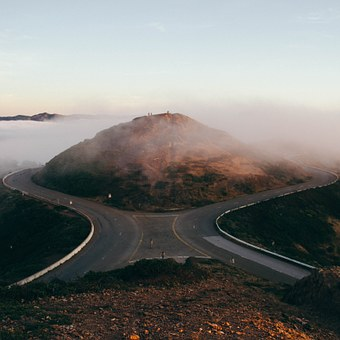

(Do we go left or right?!)

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot
import numpy as np

In [2]:
data = utils.get_dataset()

In [3]:
data.shape

(2240, 29)

In [4]:
%%capture
df = preprocessing.morten_preprocessing_pipeline(data)

In [5]:
df.shape

(2222, 32)

In [6]:
# get a list of all columns
columns = df.columns.tolist()

In [7]:
# remove target feature Response from the list
columns.remove("Response")

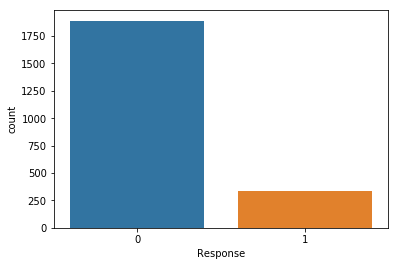

In [8]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [9]:
df["Response"].value_counts()

0    1890
1     332
Name: Response, dtype: int64

Scaling can be neglected for now. In general decision trees do not require scaling.

In [10]:
seed = 0

In [11]:
# idea split the dataset before applying oversampling to have a "real test"
def split_wo_target(df):
    split = np.random.rand(len(df)) < 0.8
    train = df[split]
    test = df[~split]
    return train, test

### Random Oversampling with only applying it to train data

In [17]:
train, test = split_wo_target(df)

In [18]:
# apply oversampling to train
train = preprocessing.random_oversampling(train, 5, seed)

In [13]:
X_train, y_train, X_test, y_test = train[columns], train["Response"], test[columns], test["Response"]

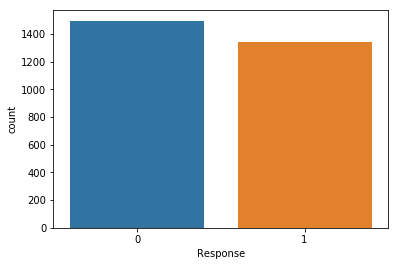

In [19]:
# now the training dataset is almost balanced
countplot(x="Response", data=train)

In [20]:
# get a Decision Tree classifier
dtree = decision_tree(X_train, y_train, "entropy")
print("Classification accuracy on training data: {:.2f}".format(dtree.score(X_train, y_train)))

Classification accuracy on training data: 0.99


In [21]:
# worth 
fi = dict(zip(columns, dtree.feature_importances_))
fidf = pd.DataFrame(fi, index=["worth"])
fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
display(fidf_t)
print("The worth in normalized, as it sums to {:.2f}".format(fidf_t["worth"].sum()))

,worth
Responsiveness,0.174036
Recency,0.137909
Dt_Customer,0.129689
MntMeatProducts,0.106782
NumWebVisitsMonth,0.049279
Income,0.042487
Partner,0.039969
MntGoldProds,0.039583
MntWines,0.034471
NumStorePurchases,0.033498


The worth in normalized, as it sums to 1.00


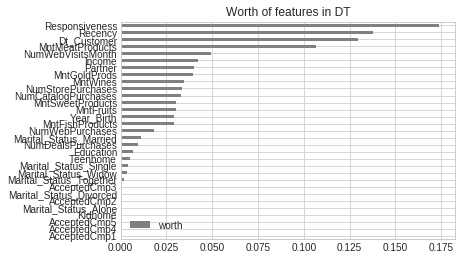

In [22]:
# visually 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
axes = fidf_t.sort_values(by="worth").plot.barh(y='worth', color='gray')
axes.set_title("Worth of features in DT")
plt.show()

In [23]:
y_pred = dtree.predict(X_test)

Normalized confusion matrix
[[ 0.90547264  0.09452736]
 [ 0.53623188  0.46376812]]


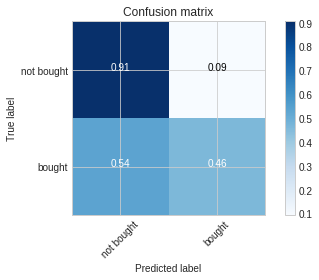

In [24]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [27]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

Accuracy 0.84
Area under the curve 0.68
Precision 0.46
Recall 0.46
Profit Share 0.26


### Centroid-Based Undersampling with only applying it to train data

In [30]:
train, test = split_wo_target(df)

In [31]:
%%capture
# transform the df to X_f using the exact ratio of 0 and 1: 17%
train = preprocessing.centroid_undersampling(X=train, f=0.17)

In [32]:
X_train, y_train, X_test, y_test = train[columns], train["Response"], test[columns], test["Response"]

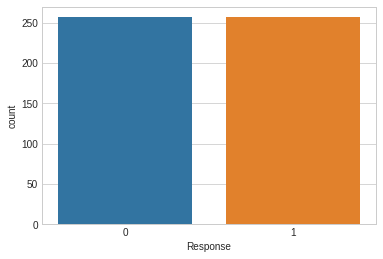

In [33]:
# now the training dataset is almost balanced
countplot(x="Response", data=train)

In [34]:
# get a Decision Tree classifier
dtree = decision_tree(X_train, y_train, "entropy")
print("Classification accuracy on training data: {:.2f}".format(dtree.score(X_train, y_train)))

Classification accuracy on training data: 0.99


In [35]:
# worth 
fi = dict(zip(columns, dtree.feature_importances_))
fidf = pd.DataFrame(fi, index=["worth"])
fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
display(fidf_t)
print("The worth in normalized, as it sums to {:.2f}".format(fidf_t["worth"].sum()))

,worth
Income,0.509636
Dt_Customer,0.102149
Recency,0.072621
MntMeatProducts,0.065376
Responsiveness,0.054505
MntGoldProds,0.053891
Year_Birth,0.046339
MntWines,0.015702
NumWebPurchases,0.015601
Partner,0.013212


The worth in normalized, as it sums to 1.00


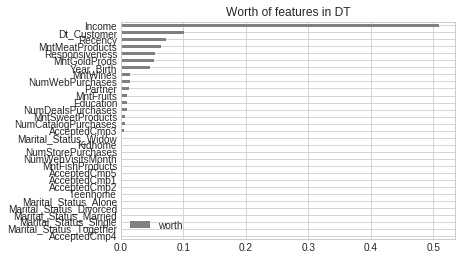

In [36]:
# visually 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
axes = fidf_t.sort_values(by="worth").plot.barh(y='worth', color='gray')
axes.set_title("Worth of features in DT")
plt.show()

In [37]:
y_pred = dtree.predict(X_test)

Normalized confusion matrix
[[ 0.15159574  0.84840426]
 [ 0.22666667  0.77333333]]


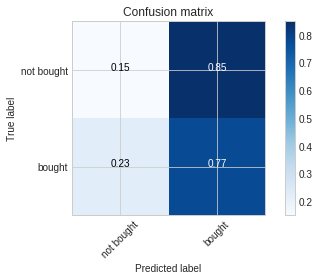

In [38]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [39]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

Accuracy 0.25
Area under the curve 0.46
Precision 0.77
Recall 0.15
Profit Share 0.14


### DT on imbalanced dataset

In [57]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(df, test_size=0.2, random_state=seed)

In [58]:
# get a Decision Tree classifier, use class_weight "balanced" or leave it
dtree = decision_tree(X_train, y_train, "entropy")
print("Classification accuracy on training data: {:.2f}".format(dtree.score(X_train, y_train)))

Classification accuracy on training data: 0.99


In [59]:
# worth 
fi = dict(zip(columns, dtree.feature_importances_))
fidf = pd.DataFrame(fi, index=["worth"])
fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
display(fidf_t)
print("The worth in normalized, as it sums to {:.2f}".format(fidf_t["worth"].sum()))

,worth
Responsiveness,0.166925
Recency,0.118755
Dt_Customer,0.113134
MntMeatProducts,0.070958
MntSweetProducts,0.069531
NumStorePurchases,0.061743
MntWines,0.043467
MntFruits,0.040238
Partner,0.037046
MntFishProducts,0.036000


The worth in normalized, as it sums to 1.00


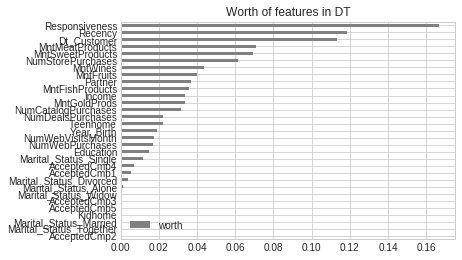

In [60]:
# visually 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
axes = fidf_t.sort_values(by="worth").plot.barh(y='worth', color='gray')
axes.set_title("Worth of features in DT")
plt.show()

In [61]:
y_pred = dtree.predict(X_test)

Normalized confusion matrix
[[ 0.93684211  0.06315789]
 [ 0.53846154  0.46153846]]


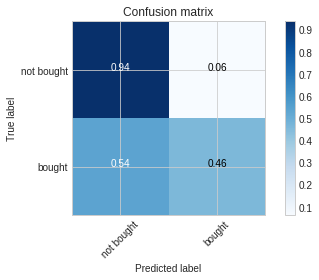

In [62]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [63]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

Accuracy 0.87
Area under the curve 0.73
Precision 0.46
Recall 0.56
Profit Share 0.31


### Best Decision Tree -> Profit Share: 0.41

In [115]:
for i in range(2,2):
    tree = DecisionTreeClassifier(criterion="entropy",
                                  random_state=seed,
                                  max_depth=6,
                                  min_samples_split=34,
                                 min_samples_leaf=1,
                                  class_weight="balanced"
                                 )
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("I:",i, "Profit:", utils.profit_share(y_pred, y_test))

In [118]:
tree = DecisionTreeClassifier(criterion="entropy",
                                  random_state=seed,
                                  max_depth=6,
                                  min_samples_split=34,
                                 min_samples_leaf=1
                                 )
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Profit:", utils.profit_share(y_pred, y_test))

Profit: 0.41


In [119]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

Accuracy 0.89
Area under the curve 0.80
Precision 0.48
Recall 0.69
Profit Share 0.41


Normalized confusion matrix
[[ 0.96315789  0.03684211]
 [ 0.52307692  0.47692308]]


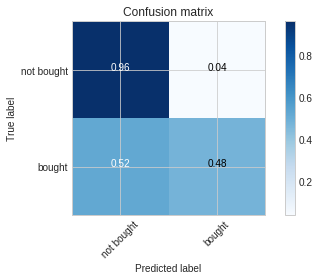

In [120]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)